In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [8]:
# Define a year as a "Superman year"
# whose films feature more Superman characters than Batman.
# How many years in film history have been Superman years?

c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [9]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

Superman years:
11


In [10]:
# How many years have been "Batman years",
# with more Batman characters than Superman characters?

print('Batman years:')
print(len(d[d < 0.0]))

Batman years:
26


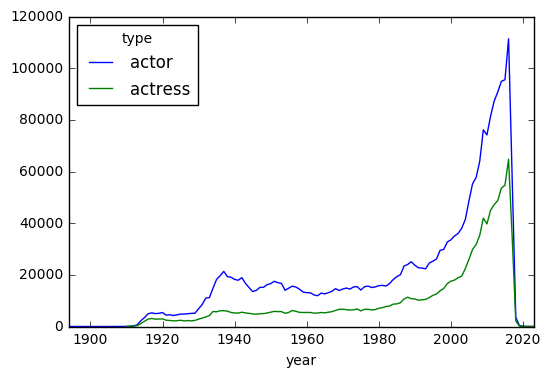

In [11]:
# Plot the number of actor roles each year
# and the number of actress roles each year
# over the history of film.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot()

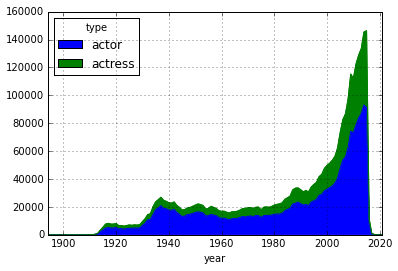

In [9]:
# Plot the number of actor roles each year
# and the number of actress roles each year,
# but this time as a kind='area' plot.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind='area')

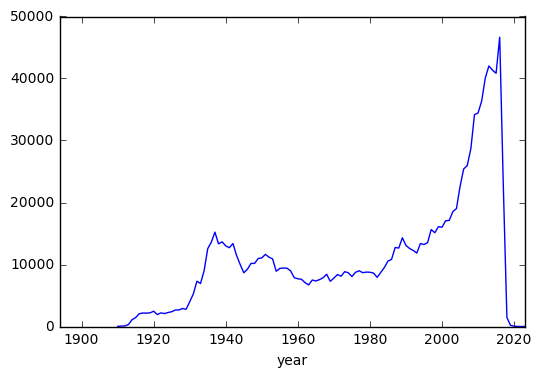

In [12]:
# Plot the difference between the number of actor roles each year
# and the number of actress roles each year over the history of film.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor - c.actress).plot()

In [15]:
# Plot the fraction of roles that have been 'actor' roles
# each year in the hitsory of film.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

year
1894    0.666667
1900         NaN
1905         NaN
1906    0.823529
1907         NaN
1908    0.690476
1909         NaN
1910    0.647059
1911    0.671642
1912    0.617722
1913    0.655689
1914    0.660294
1915    0.630309
1916    0.631687
1917    0.629983
1918    0.637513
1919    0.637386
1920    0.647235
1921    0.641123
1922    0.659636
1923    0.661749
1924    0.667657
1925    0.664913
1926    0.690620
1927    0.684102
1928    0.699284
1929    0.684476
1930    0.705464
1931    0.723073
1932    0.748571
          ...   
1994    0.687116
1995    0.677005
1996    0.674969
1997    0.680488
1998    0.669758
1999    0.663266
2000    0.656597
2001    0.660962
2002    0.655741
2003    0.661002
2004    0.648955
2005    0.651324
2006    0.649338
2007    0.645230
2008    0.644449
2009    0.644651
2010    0.651234
2011    0.643962
2012    0.649084
2013    0.650625
2014    0.639276
2015    0.635955
2016    0.632460
2017    0.623837
2018    0.625843
2019    0.687243
2020    0.673077
2021    0

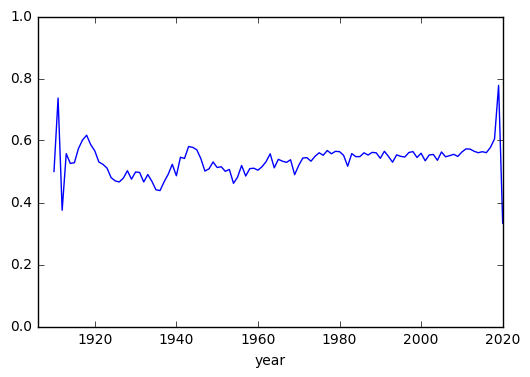

In [18]:
# Plot the fraction of supporting (n=2) roles
# that have been 'actor' roles
# each year in the history of film.

c = cast
c = c[c.n == 2]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

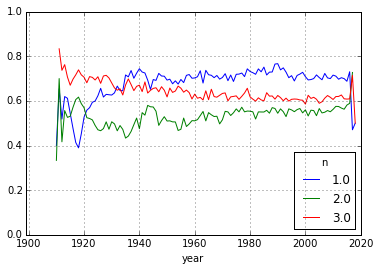

In [13]:
# Build a plot with a line for each rank n=1 through n=3,
# where the line shows what fraction of that rank's roles
# were 'actor' roles for each year in the history of film.

c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1])